<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/8_%EB%B6%84%EB%A5%98_%ED%95%99%EC%8A%B5_%EC%A0%84%EC%B2%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('22_21_20_player_role.csv')
df['롱패스'] = df['롱패스 시도'] + df['중거리패스 시도']
df = df.drop(columns=['Unnamed: 0', '년도', '클럽명', '선수명', '롱패스 시도', '중거리패스 시도', '경합 지상 성공'])
df = df[['출전시간', '득점', '도움', '슈팅', '스로인', '드리블 시도', '키패스', '전방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도', '중앙지역패스 시도',
            '롱패스', '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도', '태클 시도', '클리어링', '인터셉트', '차단', '블락', '파울', '피파울', 'Position', 'Role', 'Detailed Role']]
df.columns = ['Time', 'Goal', 'Ass', 'Shoot', 'Throw', 'Dribble', 'KPass', 'FP', 'CP', 'AP', 'DP', 'MP', 'LP', 'SP', 'Cross', 'RG', 'RS', 'Takkle', 'Clearing', 'Intercept', 'Cut', 'Block', 'Foul', 'Fouled', 'Position', 'Role', 'Detailed Role']
df

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled,Position,Role,Detailed Role
0,386,3,0,11,3,16,1,24,48,46,...,10,3,6,6,8,11,10,FW,WF,Wide Threat
1,541,1,0,6,0,3,4,69,44,42,...,13,9,14,14,15,11,10,MF,CAM,Box crasher
2,3287,12,13,64,5,46,78,293,432,510,...,83,22,35,29,45,23,20,FW,WF,Unlocker
3,2941,0,1,21,0,7,9,392,585,188,...,73,116,100,74,96,38,34,MF,CAM,Box crasher
4,694,0,1,9,1,5,4,166,132,90,...,19,10,22,14,18,11,17,MF,CDM,Builder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,70,47,...,1,5,3,12,2,2,3,DF,FB,Progressor
1697,1671,5,6,27,0,35,30,146,264,300,...,13,6,29,30,0,29,20,FW,WF,Unlocker
1698,2456,1,0,11,2,1,4,581,532,19,...,22,72,53,134,15,42,18,DF,CB,SCB
1699,624,0,0,1,46,3,0,161,90,74,...,2,4,7,19,0,15,8,DF,FB,Progressor


In [ ]:
X = df.iloc[:, :-3]
X

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,386,3,0,11,3,16,1,24,48,46,...,4,12,12,10,3,6,6,8,11,10
1,541,1,0,6,0,3,4,69,44,42,...,3,20,17,13,9,14,14,15,11,10
2,3287,12,13,64,5,46,78,293,432,510,...,291,84,41,83,22,35,29,45,23,20
3,2941,0,1,21,0,7,9,392,585,188,...,8,65,99,73,116,100,74,96,38,34
4,694,0,1,9,1,5,4,166,132,90,...,2,15,18,19,10,22,14,18,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,70,47,...,13,7,4,1,5,3,12,2,2,3
1697,1671,5,6,27,0,35,30,146,264,300,...,88,118,76,13,6,29,30,0,29,20
1698,2456,1,0,11,2,1,4,581,532,19,...,4,46,121,22,72,53,134,15,42,18
1699,624,0,0,1,46,3,0,161,90,74,...,21,12,7,2,4,7,19,0,15,8


In [ ]:
y = df.iloc[:, -1]
y

0       Wide Threat
1       Box crasher
2          Unlocker
3       Box crasher
4           Builder
           ...     
1696     Progressor
1697       Unlocker
1698            SCB
1699     Progressor
1700     Box to Box
Name: Detailed Role, Length: 1701, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 타겟 데이터의 라벨인코딩 - 머신러닝
le = LabelEncoder()
y_la_en = le.fit_transform(y)
y_la_en[:5]

array([17,  1, 16,  1,  3])

In [ ]:
# 타겟 데이터의 원-핫 인코딩 - 딥러닝
y_onehot = pd.get_dummies(y).values
y_onehot[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=uint8)

In [ ]:
for i in range(len(X)):
    x = X.Time[i] / 60
    X.iloc[i, :] /= x
X = X.drop(columns=['Time'])
X

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,CP,AP,DP,...,Cross,RG,RS,Takkle,Clearing,Intercept,Cut,Block,Foul,Fouled
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,7.461140,7.150259,1.398964,...,0.621762,1.865285,1.865285,1.554404,0.466321,0.932642,0.932642,1.243523,1.709845,1.554404
1,0.110906,0.000000,0.665434,0.000000,0.332717,0.443623,7.652495,4.879852,4.658041,3.105360,...,0.332717,2.218115,1.885397,1.441774,0.998152,1.552680,1.552680,1.663586,1.219963,1.109057
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,7.885610,9.309401,2.044417,...,5.311834,1.533313,0.748403,1.515059,0.401582,0.638880,0.529358,0.821418,0.419836,0.365075
3,0.000000,0.020401,0.428426,0.000000,0.142809,0.183611,7.997280,11.934716,3.835430,3.855831,...,0.163210,1.326080,2.019721,1.489289,2.366542,2.040122,1.509691,1.958518,0.775247,0.693642
4,0.000000,0.086455,0.778098,0.086455,0.432277,0.345821,14.351585,11.412104,7.780980,3.631124,...,0.172911,1.296830,1.556196,1.642651,0.864553,1.902017,1.210375,1.556196,0.951009,1.469741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,14.736842,9.894737,8.210526,...,2.736842,1.473684,0.842105,0.210526,1.052632,0.631579,2.526316,0.421053,0.421053,0.631579
1697,0.179533,0.215440,0.969479,0.000000,1.256732,1.077199,5.242370,9.479354,10.771993,0.897666,...,3.159785,4.236984,2.728905,0.466786,0.215440,1.041293,1.077199,0.000000,1.041293,0.718133
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,12.996743,0.464169,13.387622,...,0.097720,1.123779,2.956026,0.537459,1.758958,1.294788,3.273616,0.366450,1.026059,0.439739
1699,0.000000,0.000000,0.096154,4.423077,0.288462,0.000000,15.480769,8.653846,7.115385,6.153846,...,2.019231,1.153846,0.673077,0.192308,0.384615,0.673077,1.826923,0.000000,1.442308,0.769231


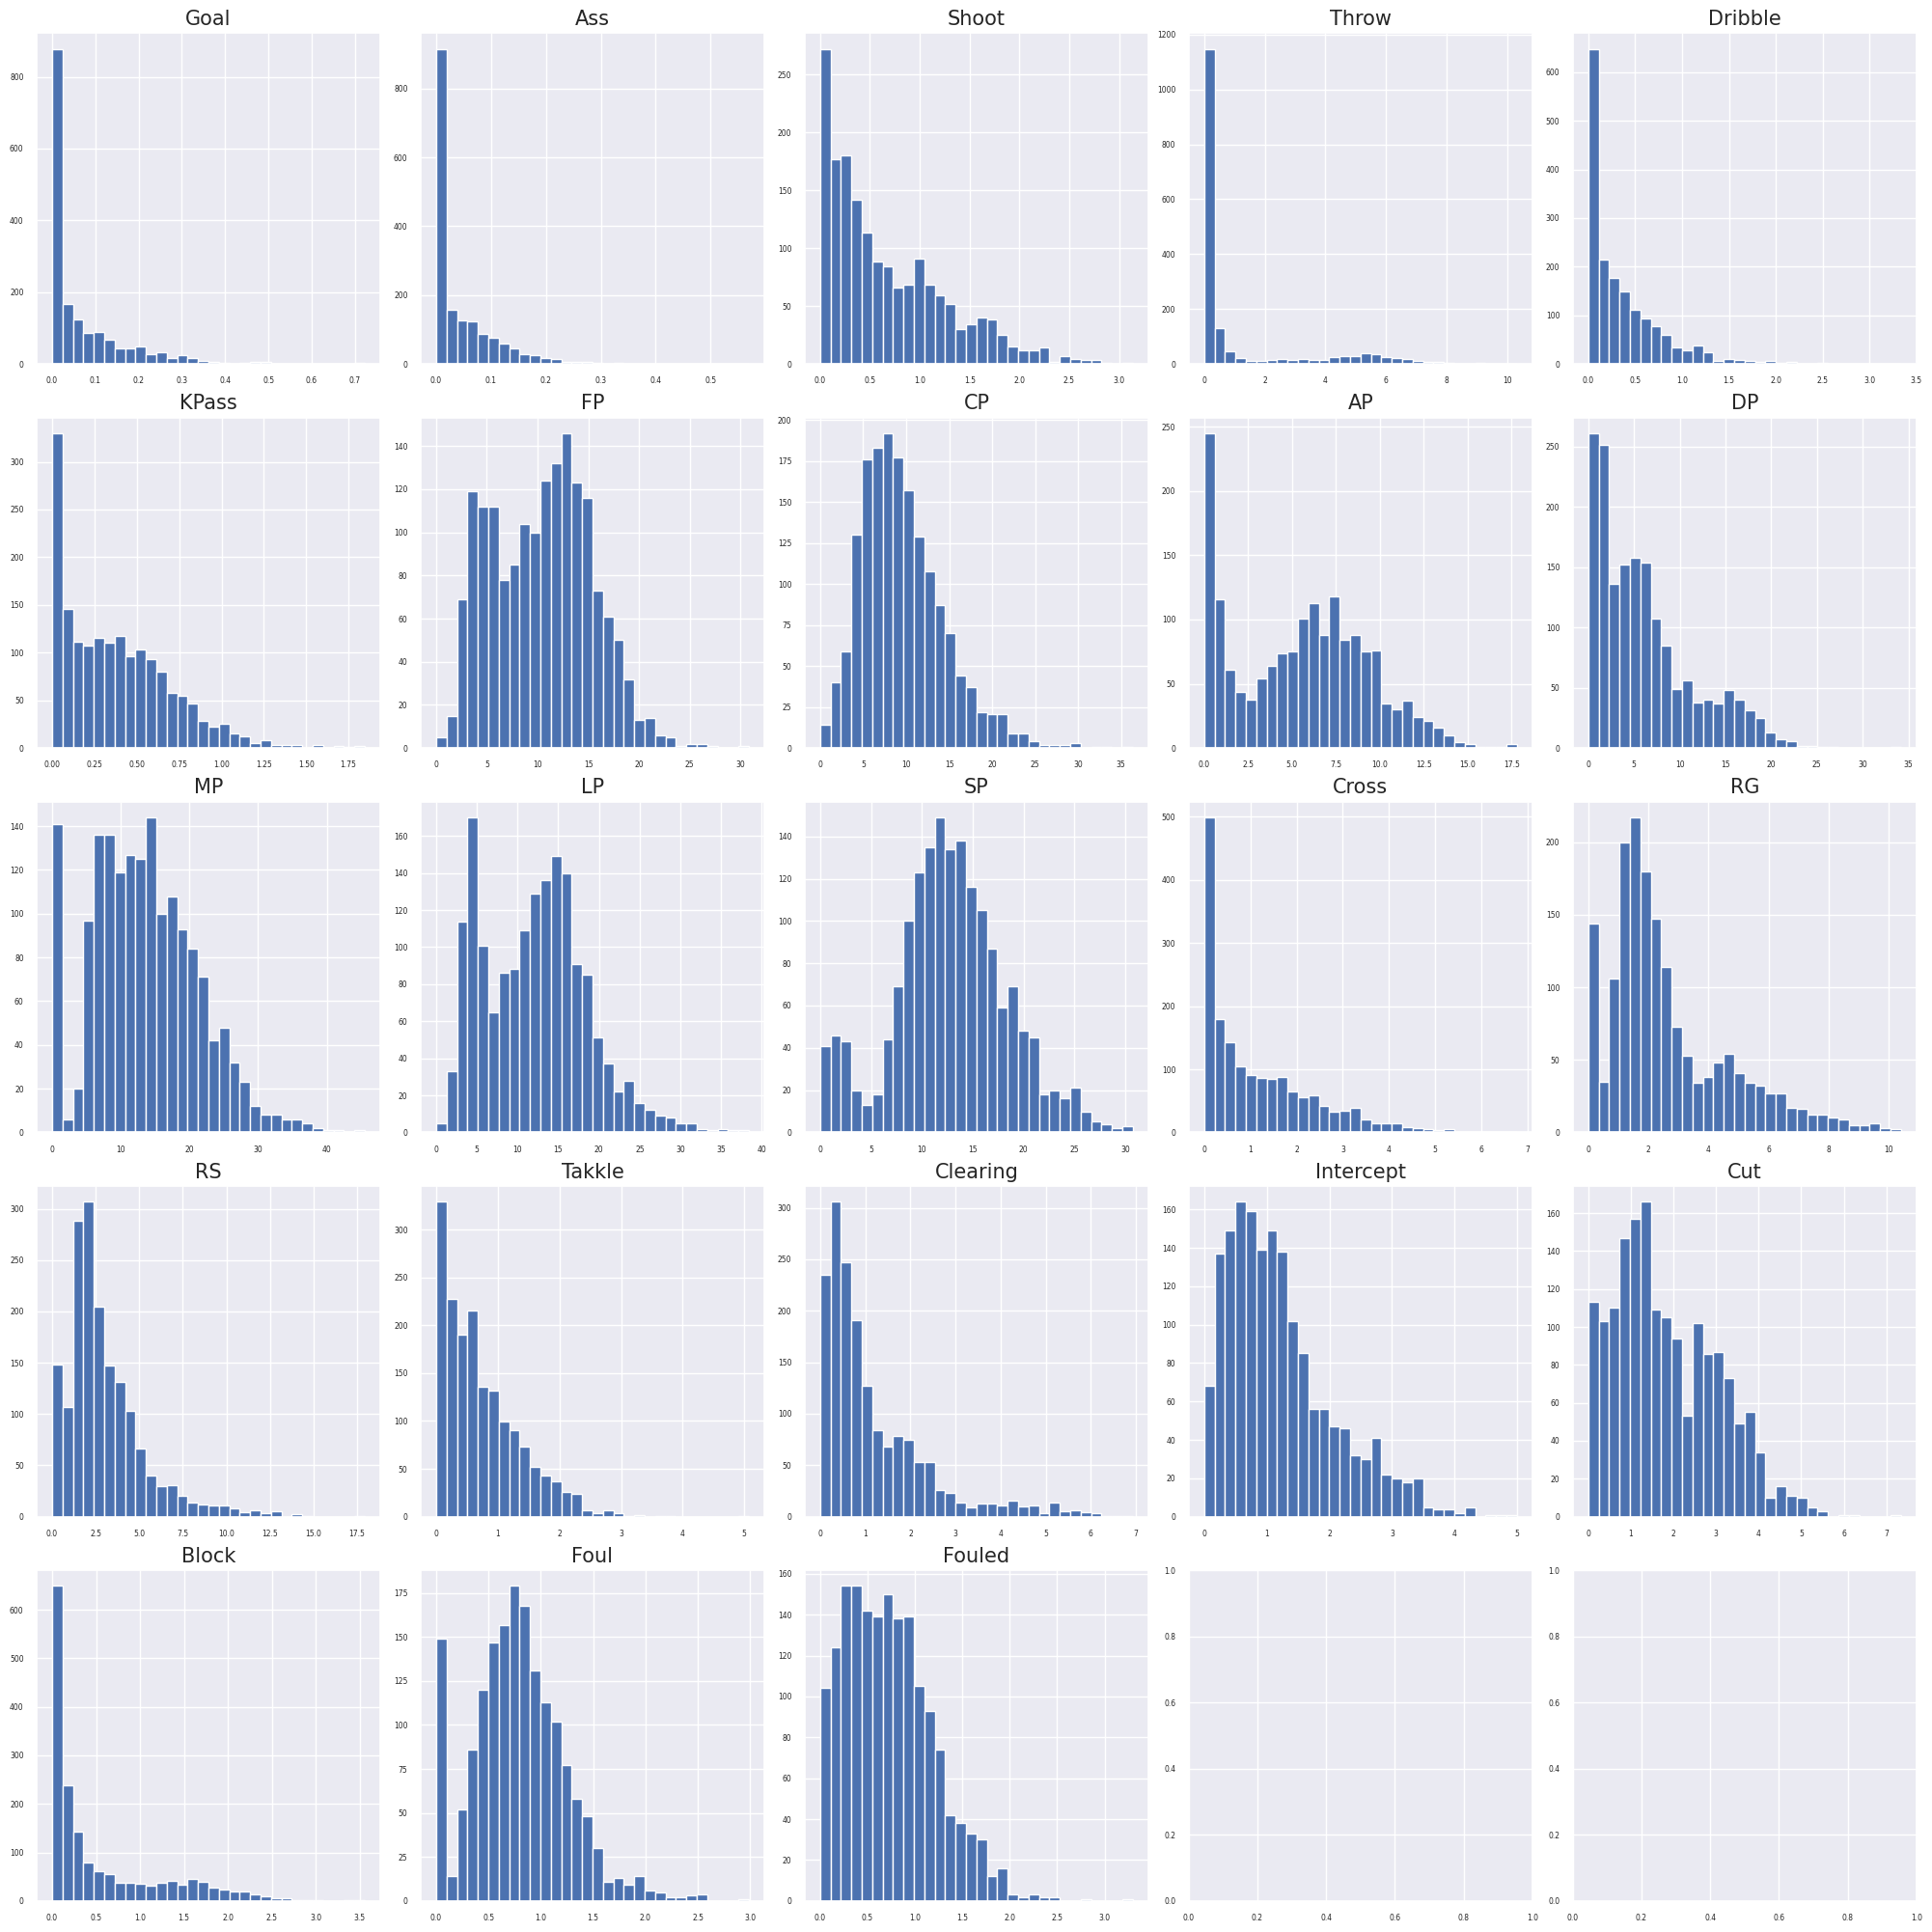

In [ ]:
# subplot 그리기
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# 각 subplot에 데이터 분포 그리기
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        ax.hist(X.iloc[:, i], bins=30)
        ax.set_title(X.columns[i], fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
def sqrt_transform(x):
    return np.sqrt(x)

In [ ]:
for i in range(len(X.columns)):
    X[X.columns[i]] = X[X.columns[i]].apply(sqrt_transform)

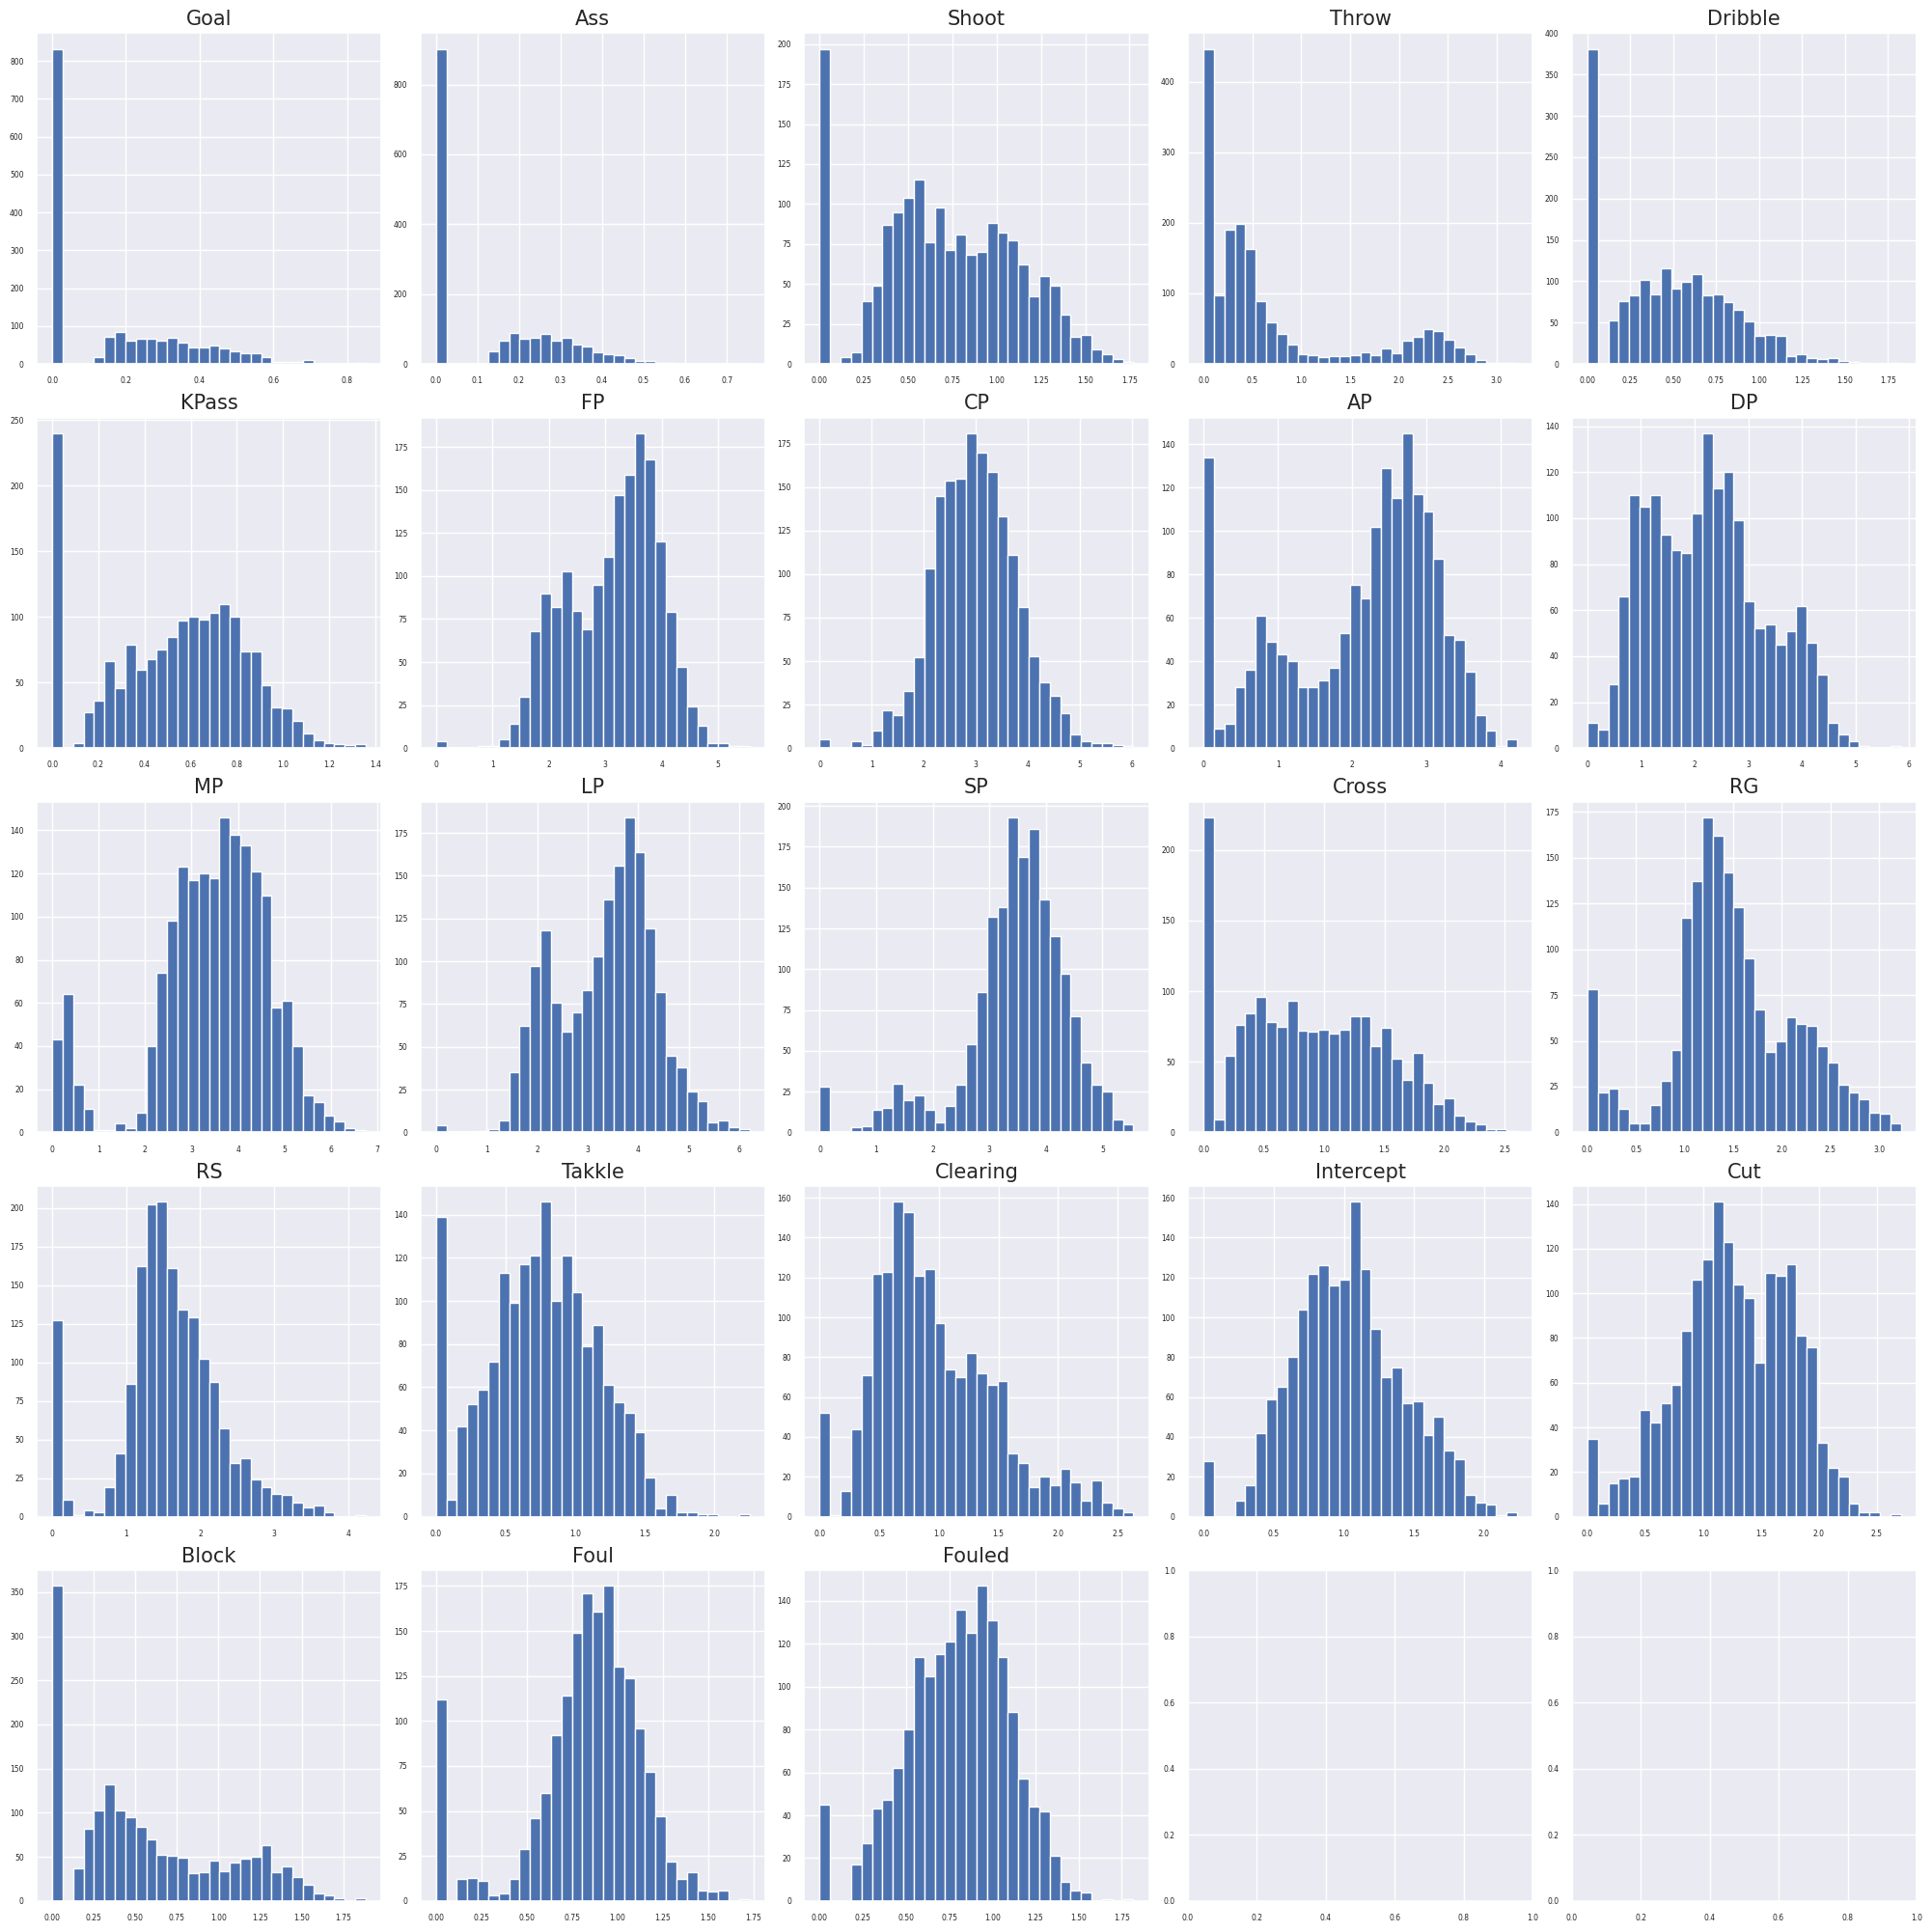

In [ ]:
# subplot 그리기
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# 각 subplot에 데이터 분포 그리기
for i, ax in enumerate(axs.flatten()):
    if i < len(X.columns):
        ax.hist(X.iloc[:, i], bins=30)
        ax.set_title(X.columns[i], fontsize=15)

plt.tight_layout()
plt.show()

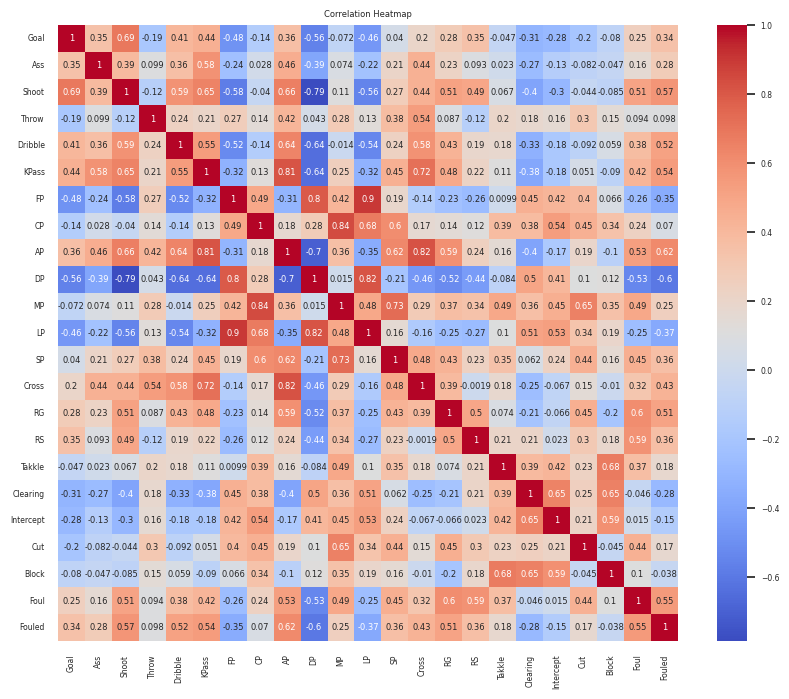

In [ ]:
# 상관관계 분석
corr = X.corr()

# 히트맵 그리기
sns.set(font_scale=0.5)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

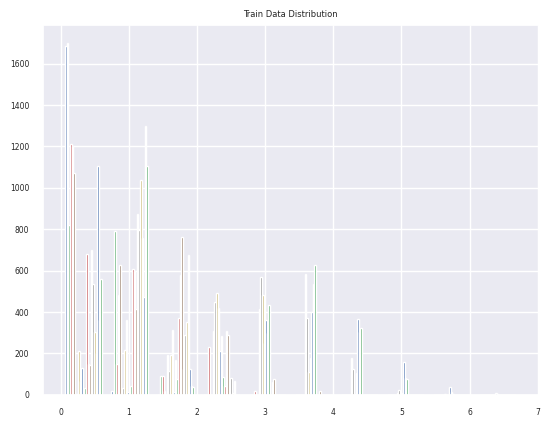

In [ ]:
# train 데이터 분포 시각화
plt.hist(X)
plt.title('Train Data Distribution')
plt.show()

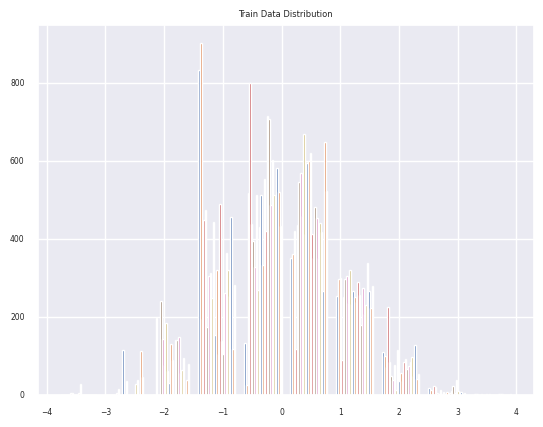

In [ ]:
# 입력 데이터의 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train 데이터 분포 시각화
plt.hist(X_scaled)
plt.title('Train Data Distribution')
plt.show()

# 딥러닝 - 18개 분류

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 학습 데이터와 평가 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# 2. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(18, activation='softmax')
])

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# 5. 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 3.1667 - accuracy: 0.0684 - val_loss: 2.7251 - val_accuracy: 0.1584
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 2.8478 - accuracy: 0.0956 - val_loss: 2.5578 - val_accuracy: 0.2463
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 2.6662 - accuracy: 0.1493 - val_loss: 2.4369 - val_accuracy: 0.3226
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 2.5616 - accuracy: 0.2044 - val_loss: 2.3336 - val_accuracy: 0.3636
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 2.4647 - accuracy: 0.2199 - val_loss: 2.2415 - val_accuracy: 0.3695
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 2.3439 - accuracy: 0.2662 - val_loss: 2.1432 - val_accuracy: 0.3812
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 2.2943 - accuracy: 0.2721 - val_loss: 2.0621 - val_accuracy: 0.3871
Epoch 8/100


# 머신러닝 이용

In [ ]:
y_np = np.array(y)
y_np

array(['Wide Threat', 'Box crasher', 'Unlocker', ..., 'SCB', 'Progressor',
       'Box to Box'], dtype=object)

## 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# DecisitonTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.7214


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=y_np, feature_names=X.columns, impurity=True, filled=True)

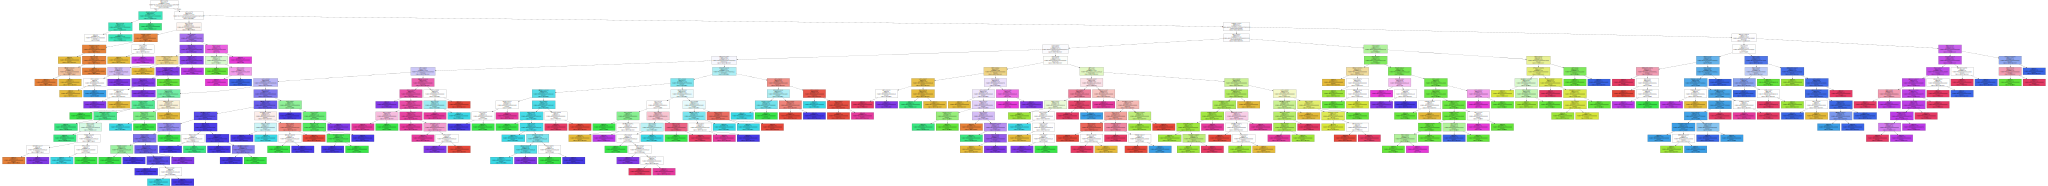

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : 
[0.007 0.004 0.03  0.07  0.016 0.012 0.031 0.016 0.197 0.046 0.165 0.099
 0.108 0.047 0.011 0.011 0.006 0.011 0.018 0.007 0.058 0.013 0.016]
Goal : 0.007
Ass : 0.004
Shoot : 0.030
Throw : 0.070
Dribble : 0.016
KPass : 0.012
FP : 0.031
CP : 0.016
AP : 0.197
DP : 0.046
MP : 0.165
LP : 0.099
SP : 0.108
Cross : 0.047
RG : 0.011
RS : 0.011
Takkle : 0.006
Clearing : 0.011
Intercept : 0.018
Cut : 0.007
Block : 0.058
Foul : 0.013
Fouled : 0.016


<Axes: >

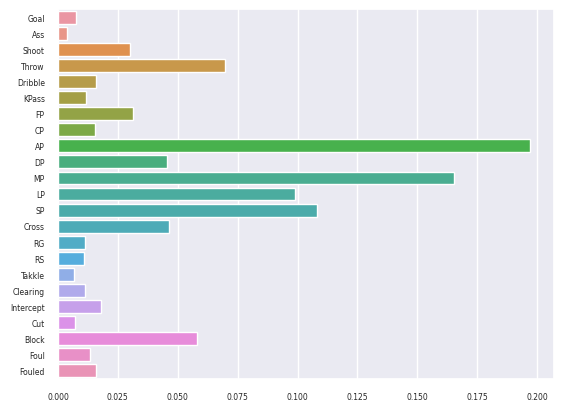

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# feature importance 추출
print('Feature importances : \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 columns 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=X.columns)

In [ ]:
# DecisionTreeClassifier 하이퍼 파라미터 추출
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [ ]:
grid_cv.best_score_

0.748529411764706

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 24}

In [ ]:
grid_cv.best_score_

0.7514705882352941

## 앙상블 학습

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=18)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
np.round(accuracy_score(y_test, pred), 3)

0.704

In [ ]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.6452
KNeighborsClassifier 정확도 : 0.6891


## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=77)

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
np.round(accuracy, 3)

0.795

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터 : {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도 : 0.8316


# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_la_en, test_size=0.2, random_state=77)

gb_clf = GradientBoostingClassifier(random_state=7)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

gb_accuracy

0.7976539589442815